## K-Nearest Neighbors Classifier on Iris Dataset

As you may remember from class, K-Nearest Neighbors is an algorithm that attempts to classify an input based on the similarity of certain features to objects that are already in a known class. Each example is plotted as a function of its features. For the example of flowers, this could be the number of pedals and the length of its stem. The numerical distance of a new example's features to each of the old examples' features is calculated, and whichever k examples are 'nearest' to the new example determine which class it belongs to.
For example, if k is 3, the 3 previous examples with features most numerically similar to an unknown example 
will be considered. If 2 of these 3 previous examples are Class 1, while the third is Class 2, 
the K-Nearest Neighbors algorithm will determine that your unknown example is also in Class 1. 
The number 'k' can also be changed to look at more or less previous examples.

The dataset you will be using to explore this algorithm is the iris dataset. This dataset contains information about three species of the iris flower, characterized by the length and width of the sepals and pedals, giving four total features. 

Lets jump right into it by importing the required libraries.

In [1]:
# import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


iris = datasets.load_iris()


# make sure everything was correctly imported
iris.data.shape, iris.target.shape

Illegal line #1
	"~/.matplotlib/matplotlibrc
"
	in file "/Users/bahareh/.matplotlib/matplotlibrc"


((150, 4), (150,))

### Building data sets
Let's start constructing the K-NN model by splitting the whole data set into training and test data sets. Play around with 'random_state' to generate different splits. You may remember that the training set is used to tell the model what is known, while the test set is used to validate that the model is working.

As a general rule for these exercises, look at the functions that have been imported and figure out how to use them via their documentation.

In [4]:
from sklearn.model_selection import train_test_split
X = iris.data  # take all the features
y = iris.target

## To do: split the data set into training and testing data set with size 100/50 respectively

## check the training and testing data size


### Visualise the data
Before starting to use machine learning, it is often useful to visualise your dataset to get a good understanding of what you are dealing with. Here, we will plot the data with respect to two of its features, namely the sepal length and width of each flower. Different colors represent the different classes of flower.

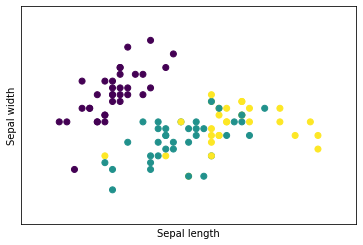

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)
# import training data to visualize
X = X_train[:, :2]  # we only take the first two features.
y = y_train


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


plt.show()

Great! You can see here that even when you are only considering these two features, there are some differences between the classes.
However, to get a more clear separation, we can use all four features provided by the dataset, though this is more difficult to visualise.

### Building the model
Now that we have all of our data set up, we can start playing with the K-NN model!
We will start by putting the Scikit-Learn K-NN model into a function so we can easily call it and adjust it.

In [ ]:
def knn_classifier(k, test_data, test_target, train_data, train_target):
    """k: number of neighbors to use in classication
    test_data: the data/targets used to test the classifier
    train_data: the data/targets used to classify the test_data
    """
    
    ## To do: build the knn_classifier using sklearn.neighbors.KNeighborsClassifier; 
    ## return the predicted test labels or testing accuracy
    ## Hint: check the usage of sklearn.neighbors.KNeighborsClassifier and sklearn.metrics.accuracy_score
    
    return y_pred, accuracy
    

### Testing

Now lets see how this model performs on test sets.

In [ ]:
y_pred, accuracy = knn_classifier(5, X_test, y_test, X_train, y_train)

print('The accuracy of our classifier is : %d%%' %(accuracy*100))

### Varying parameters
Change the variable K in the knn model to see how it will affect the performance of the model on test data. 

In [ ]:
# creating list for accuracy and k
acc_list = []
neighbor_list = range(1,50,2)
for k in neighbor_list:
    y_pred, acc = knn_classifier(k, X_test, y_test, X_train, y_train)
    acc_list.append(acc)

# plot the figure of accuracy varying with number of neighbors K
plt.plot(neighbor_list, acc_list)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Classification Accuracy')
plt.show()


### Extensions: Parameter Tuning with Cross Validation
We’ll explore a method that can be used to tune the hyperparameter K. Cross-validation can be used to estimate the test error associated with a learning method in order to evaluate its performance, or to select the appropriate level of flexibility.

k-fold cross validation (the k is totally unrelated to K) involves randomly dividing the training set into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k−1 folds. The misclassification rate is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error which are then averaged out.

In [ ]:
from sklearn.model_selection import cross_val_score
# creating list for accuracy and k
acc_list = []
neighbor_list = range(1,50,2)

# empty list that will hold cv scores
cv_scores = []

# To do: perform 10-fold cross validation
# Hint: check the usage of cross_val_score


# plot the curve of validation accuracy varing with different K    
plt.plot(neighbor_list, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross validation classification accuracy')
plt.show()

Did you notice the difference of best K when tuned on test data and on validation data? How would you interpret this?